# **PyTorch Basic Tensor Manipulation**
-----------

Numpy에 대해 훑어보고, Tensor에 대해 알아보자   


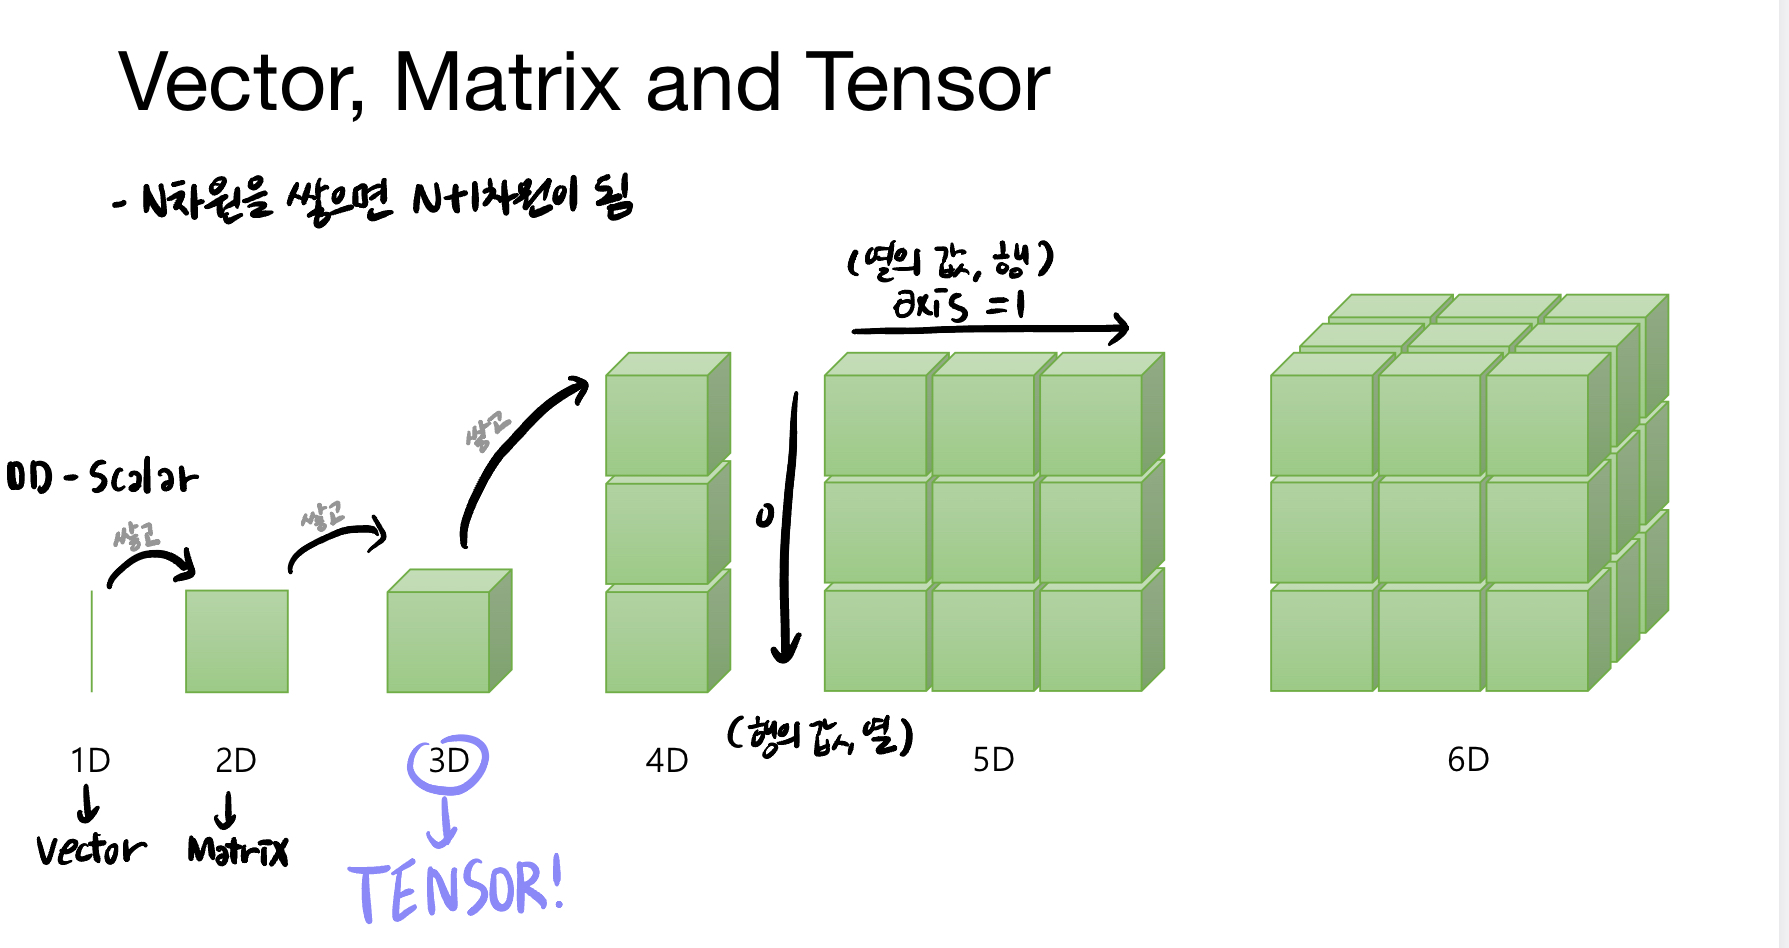

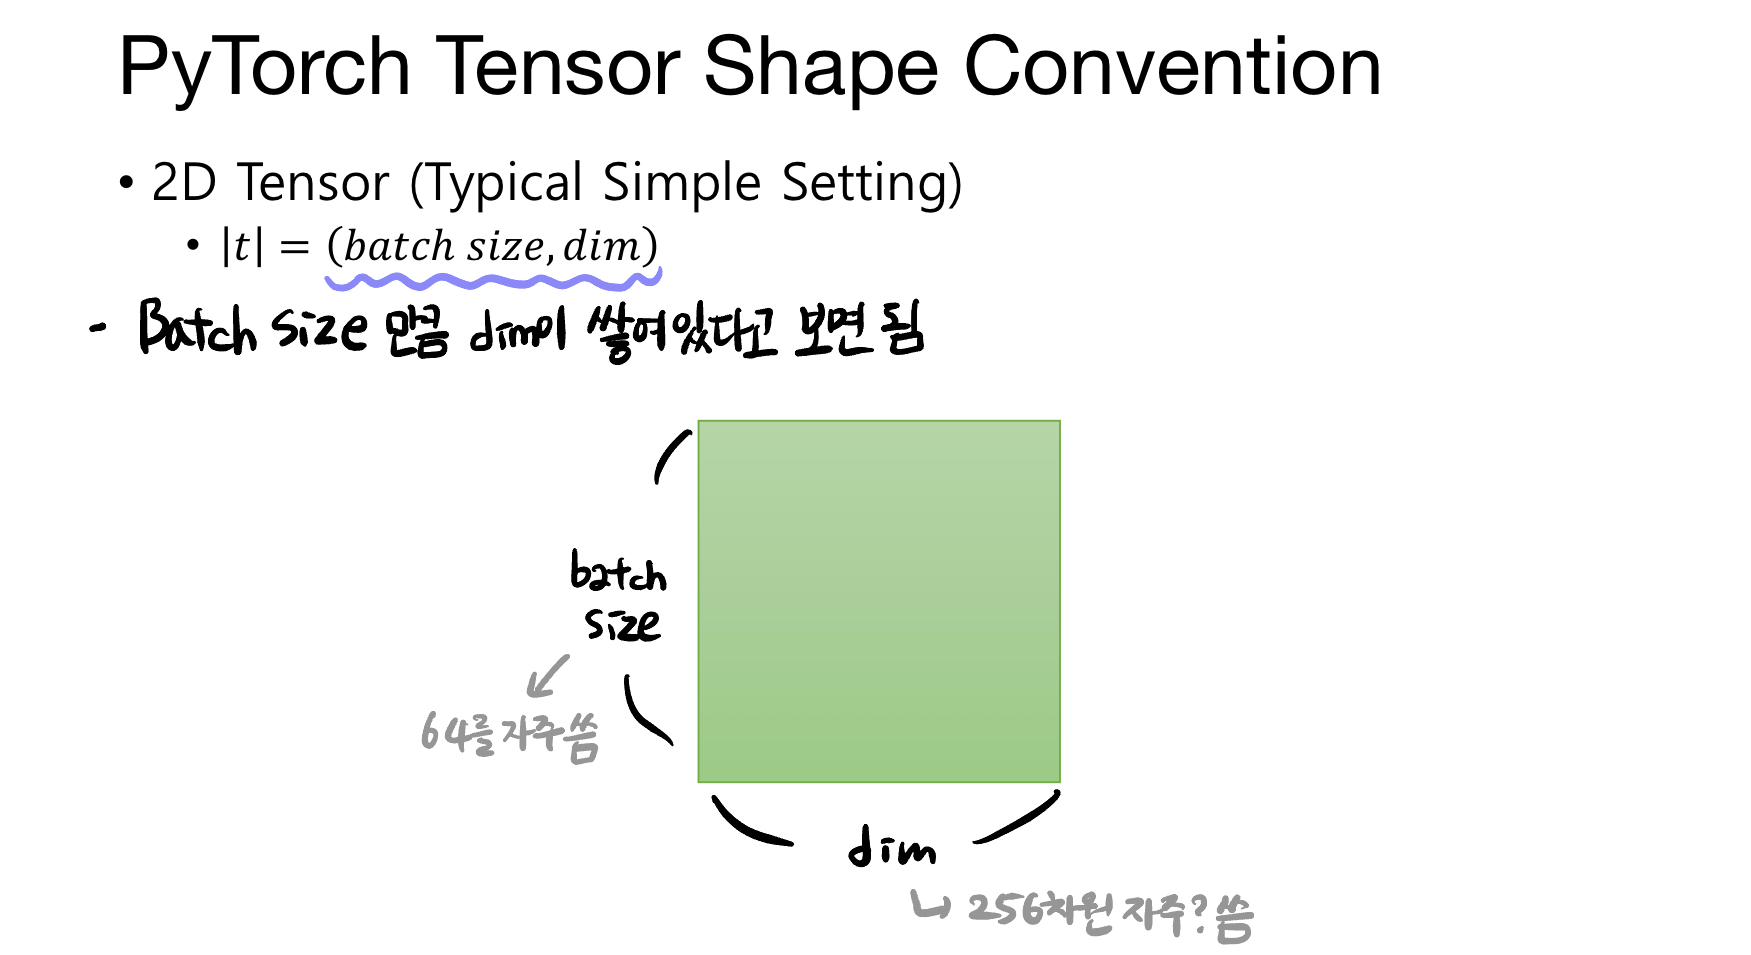

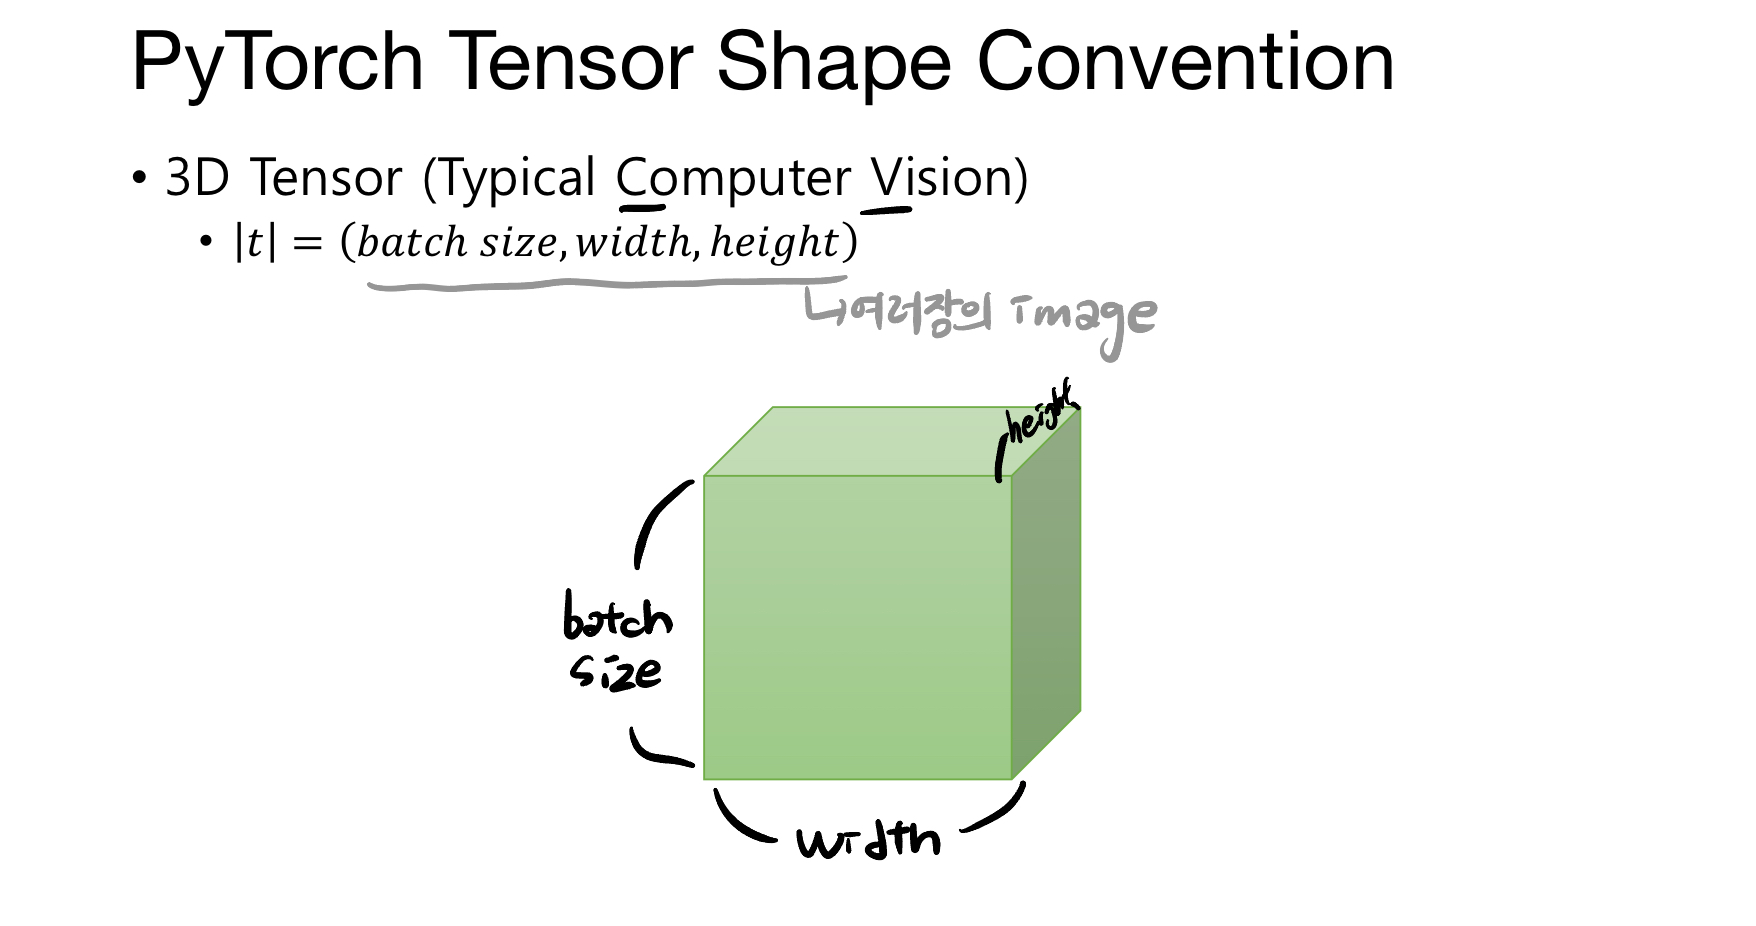

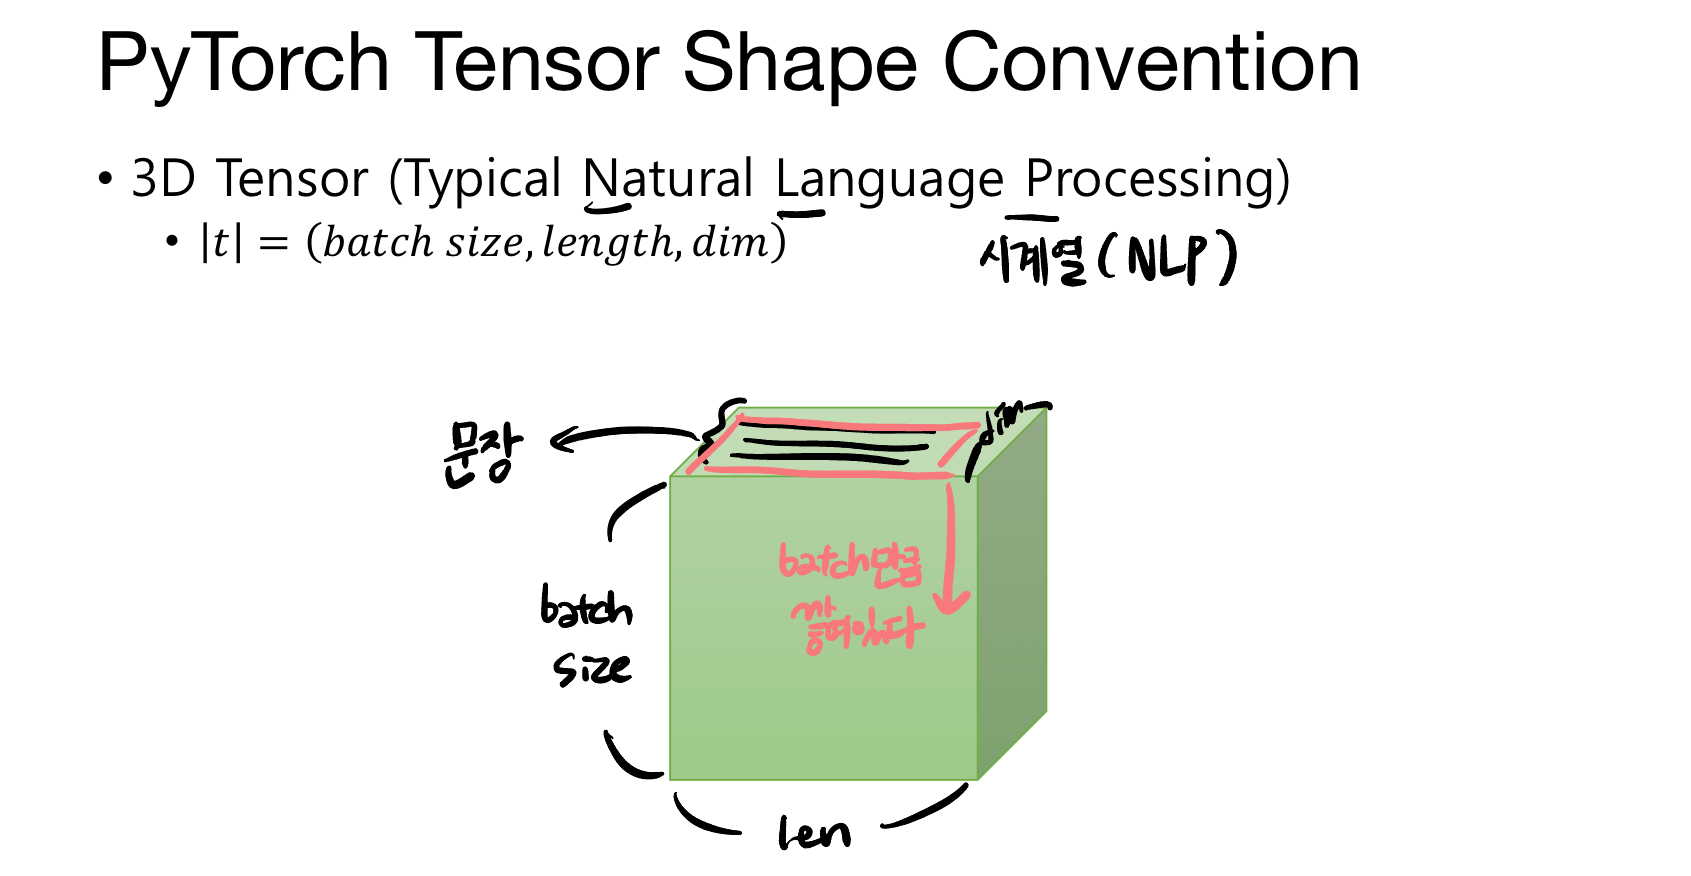

In [1]:
#NumPy

#numpy를 import 한다
import numpy as np

## 1D Array with NumPy

In [5]:
#float형식의 np.array를 생성
t = np.array([0., 1., 2., 3., 4., 5., 6.,])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [4]:
#ndim = dimention 출력
print('Rank of t: ', t.ndim)
#shape = |t| 정보 출력(튜플 형식으로)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


In [7]:
#index 접근
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) #Element
print('t[2:5], t[4:-1] = ',t[2:5], t[4:-1]) #Slicing
print('t[:2], t[3:] = ', t[:2], t[3:]) #Slicing

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5], t[4:-1] =  [2. 3. 4.] [4. 5.]
t[:2], t[3:] =  [0. 1.] [3. 4. 5. 6.]


## 2D Array with NumPy

In [11]:
#1D가 한 줄씩 쌓인다 = 2D
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [12]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  2
Shape of t:  (4, 3)


## PyTorch Tensor

In [18]:
#PyTorch
#NumPy와 아-주 비슷!
import torch

In [19]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.,])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [20]:
print(t.dim()) # rank
print(t.shape) # shape
print(t.size()) # shape
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) #Element
print('t[2:5], t[4:-1] = ',t[2:5], t[4:-1]) #Slicing
print('t[:2], t[3:] = ', t[:2], t[3:]) #Slicing

1
torch.Size([7])
torch.Size([7])
t[0] t[1] t[-1] =  tensor(0.) tensor(1.) tensor(6.)
t[2:5], t[4:-1] =  tensor([2., 3., 4.]) tensor([4., 5.])
t[:2], t[3:] =  tensor([0., 1.]) tensor([3., 4., 5., 6.])


## 2D Array with PyTorch 

In [21]:
t = torch.FloatTensor([[1., 2., 3.],
                      [4., 5., 6.],
                      [7., 8., 9.],
                      [10., 11., 12]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [22]:
print(t.dim()) #2
print(t.size()) #(4, 3)
print(t[:,1]) #전체 column값의 2번째, vector로 나옴
print(t[:,1].size())
print(t[:, -1]) #전체 column값 중 맨 마지막 값

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([ 3.,  6.,  9., 12.])


## Broadcasting

다른 size의 행렬끼리 연산하는 경우, Broadcasting으로 size를 자동으로 조정해서 계산.   
근데 자동으로 사이즈 조정해주기 때문에, 잘 사용해야 함.   

예를 들어 봅시다 ~~절망편~~         
A, B 행렬이 있는데, 둘 중 하나의 크기를 바꿔야 정확한 결과가 나옴.   
근데? 모르고 안 해버림   
그래서 Broadcasting이 깔끔하게 처리해버림   
어? 난 맞게 한 것 같은데 왜 결과가 이상하지?   

In [23]:
#Same shape

#(1, 2)의 matrix
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([2, 2])

print(m1 + m2)

tensor([[5., 5.]])


In [24]:
#Vector + scalar

m1 = torch.FloatTensor([[1, 2]]) #shape (1,2)인 행렬
m2 = torch.FloatTensor([3]) #스칼라

#[[1, 2]] + [[3, 3]]이 된다
print(m1 + m2)
print((m1 + m2).size())

tensor([[4., 5.]])
torch.Size([1, 2])


In [27]:
#2 x 1 Vector + 1 x 2 Vector

m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3],[4]])

#[[1,2], [1,2]] + [[3,3], [4,4]]가 된다
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


## Multiplication vs Matrix Multiplication
행렬곱 딥러닝에서 진짜 많이 쓴다

In [31]:
#행렬곱 - .matmul()
m1 = torch.FloatTensor([[1, 2], [3, 4]]) #(2, 2)
m2 = torch.FloatTensor([[1],[2]]) #(2, 1)
print(m1.matmul(m2)) #2 x 1

#기존 곱셈 - .mul()
print(m1 * m2)
print(m1.mul(m2)) #2 x 2

tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


## Mean
NumPy와 매우 유사

In [32]:
t = torch.FloatTensor([1,2])
print(t.mean())

tensor(1.5000)


In [33]:
#Can't use mean() on integers
#Long tensor는 수행을 못 함

t = torch.LongTensor([1,2])

try:
    print(t.mean())
except Exception as exc:
    print(exc)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


In [37]:
t = torch.FloatTensor([[1,2], [3,4]])
print(t.mean())
#Vector로 나옴
print(t.mean(dim=0)) #열 기준, 열을 없앤다
print(t.mean(dim=1)) #행 기준, 행을 없앤다
print(t.mean(dim=-1))#dim = 1이랑 같은 결과가 나오긴 함

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


## Sum

In [38]:
t = torch.FloatTensor([[1, 2], [3, 4]])

print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


## Max and Argmax
tensor.max(): [0]에는 값, [1]에는 인덱스를 반환   
Max: 값을 반환   
Argmax: 인덱스를 반환

In [42]:
t = torch.FloatTensor([[1, 2], [3, 4]])

#Max
print(t.max())
print(t.max(dim=0))

#Max vs Argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


## ✨ View(Reshape in NumPy)
모양을 원하는대로 다시 잡아주는 함수.   

**[View 예시]**    
아래 예시와 같이 Shape가 (2, 2, 3)인 행렬이 있다고 가정하자.    
3차원이 2차원을 담는 봉다리라고 생각하면, 두 봉다리에 2차원이 2개씩 들어가있는 꼴임.   
이 때, 누군가가 "다른건 모르겠고 1차원이 3개의 값을 가지는 2차원을 주세요"라고 주문함.   
마침 2차원이 3개의 값을 가지는 1차원짜리 2개로 이루어져 있기 때문에, 3차원 봉다리를 찢어버리고 2차원을 하나로 묶는다면, 주문대로 만들 수 있음.(2 x 2)   
3차원 봉지를 다 찢어버리면? 2차원들이 세상 밖으로 나오게 됨.  
따라서, 2차원이 4개가 되므로 끈으로 묶어서 (4, 3)의 행렬로 표현할 수 있음.   
   
그런데 갑자기 "마음이 바뀌었습니다. 그 상태에서 2차원을 하나씩 찢어주시고 3차원에 담아주세요"라는 주문이 들어옴.    
그렇다면, 2차원을 묶었던 끈을 잘라버리고 3차원 봉지에 2차원을 싹 다 넣으면 됨.   
모양이 (4, 1, 3)인 행렬로 표현할 수 있음.   

In [43]:
t = np.array([[[0, 1, 2],
            [3, 4, 5]],
              
            [[6, 7, 8],
            [9, 10, 11]]])

ft = torch.FloatTensor(t)

print(ft.size())

torch.Size([2, 2, 3])


In [44]:
print(ft.view([-1, 3])) #-1 뜻: '나는 모르겠다 알아서 해라'
                        #다른 차원은 상관 없고 1차원에서 3개의 값을 가지게 만들어 줘
print(ft.view([-1, 3]).shape) #2 x 2 = 4, 따라서 (4, 3)행렬이 나옴

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [47]:
print(ft.view([-1, 1, 3])) #3차원인데 2차원이 3개의 값을 가진 1차원 한 개 씩만 가지게 해줘
print(ft.view([-1, 1, 3]).shape)#2 x 2 = 4, 따라서 (4, 1, 3)행렬이 나옴

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## Squeeze
해당 dimension의 element가 1인 경우, 해당 dimension을 없앤다.(콩깍지에서 콩 쏟아내는 것 마냥 쥐어 짜기)

In [50]:
ft = torch.FloatTensor([[0], [1], [2]]) #(3, 1). 마침 1이 있네?
print(ft.shape)

print(ft.squeeze())
print(ft.squeeze().shape)

torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


## Unsqueeze
squeeze의 반대. 특정 dimension의 element가 1이 되도록 만든다.

In [53]:
ft = torch.Tensor([0, 1, 2])
print(ft.size())

torch.Size([3])


In [56]:
print(ft.unsqueeze(0)) #dim=0에다가 1을 넣는다
print(ft.unsqueeze(0).size())

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [57]:
#ft.unsqueeze(0)과 같다
print(ft.view(1, -1))
print(ft.view(1, -1).size())

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [58]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [59]:
#ft.unsqueeze(1)과 같다
print(ft.view(-1,1))
print(ft.view(-1,1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [60]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Type Casting

In [61]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [62]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [63]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [64]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate

In [65]:
#size가 같은 행렬끼리 이어붙이기
x = torch.FloatTensor([[1,2], [3, 4]])
y = torch.FloatTensor([[5, 6],[7, 8]])

print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [66]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [67]:
#torch.stack([x, y, z])와 같다
#쌓는게 아니라 이어 붙이는 거니까, 우선 x, y, z를 2차원으로 만들어서 이어 붙인다.
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))
print(torch.cat([x, y, z], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([1., 4., 2., 5., 3., 6.])


## Ones and Zeros

In [69]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [70]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-place Operation
PyTorch는 Garbage Collection 연산이 잘 돼서, 덮어 쓰기를 안 해도 크게 영향은 없다.

In [71]:
x = torch.FloatTensor([[1, 2],[3, 4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
